<a href="https://colab.research.google.com/github/MarinhoDevTi/inteligenciaArtificial/blob/main/S06_IA_ADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes neurais artificiais

In [1]:
import numpy as np

In [2]:
entrada = np.array([-2, 1, -5, 6])
pesos = np.random.rand(entrada.size)

In [3]:
def soma(e, p):
  s = 0
  for i in range(e.size):
    s += e[i] * p[i]
  return s

In [4]:
resultado1 = soma(entrada, pesos)
resultado2 = np.dot(entrada, pesos)
print(resultado1, resultado2)

-0.39405773064447924 -0.39405773064447924


In [5]:
def degrau(x):
  if x < 0:
    return 0
  if x >= 0:
    return 1

In [6]:
saida = degrau(resultado1)
saida

0

In [7]:
def sigmoide(x):
  return 1 / (1 + np.exp(-x))

In [8]:
def tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

In [9]:
def relu(x):
  if x > 0:
    return x
  if x <= 0:
    return 0

In [10]:
class Neuronio:
  def __init__(self, numero_entradas, taxa_aprendizado=0.1):
    self.pesos = np.random.rand(numero_entradas)
    self.bias = np.random.rand()
    self.taxa_aprendizado = taxa_aprendizado

  def degrau(self, x):
    if x >= 0:
      return 1
    if x < 0:
      return 0

  def treinar(self, entradas, saida_desejada, num_epocas):
    for epoca in range(num_epocas):
      erro_total = 0
      for entrada, saida in zip(entradas, saida_desejada):
        # Calcular a saída do neurônio
        soma = np.dot(self.pesos, entrada) + self.bias
        saida_obtida = self.degrau(soma)

        # Calcular o erro
        erro = saida - saida_obtida

        # Atualizar os pesos e o bias
        self.pesos += self.taxa_aprendizado * erro * entrada
        self.bias += self.taxa_aprendizado * erro

        # Acumular o erro total
        erro_total += erro
      print(f'Época: {epoca}. Erro: {erro_total}')

  def prever(self, entrada):
    soma = np.dot(self.pesos, entrada) + self.bias
    resultado = self.degrau(soma)
    return resultado


In [11]:
# Criar dados de treinamento para a porta AND
entradas = np.array([[0,0], [0,1], [1,0], [1,1]])
saida_desejada = np.array([0, 0, 0, 1])

# Criar uma instância do neurônio
neuronio = Neuronio(2)

# Treinar esse neurônio
neuronio.treinar(entradas, saida_desejada, 100)


Época: 0. Erro: -3
Época: 1. Erro: -3
Época: 2. Erro: -3
Época: 3. Erro: -1
Época: 4. Erro: -1
Época: 5. Erro: 0
Época: 6. Erro: 0
Época: 7. Erro: 0
Época: 8. Erro: 0
Época: 9. Erro: 0
Época: 10. Erro: 0
Época: 11. Erro: 0
Época: 12. Erro: 0
Época: 13. Erro: 0
Época: 14. Erro: 0
Época: 15. Erro: 0
Época: 16. Erro: 0
Época: 17. Erro: 0
Época: 18. Erro: 0
Época: 19. Erro: 0
Época: 20. Erro: 0
Época: 21. Erro: 0
Época: 22. Erro: 0
Época: 23. Erro: 0
Época: 24. Erro: 0
Época: 25. Erro: 0
Época: 26. Erro: 0
Época: 27. Erro: 0
Época: 28. Erro: 0
Época: 29. Erro: 0
Época: 30. Erro: 0
Época: 31. Erro: 0
Época: 32. Erro: 0
Época: 33. Erro: 0
Época: 34. Erro: 0
Época: 35. Erro: 0
Época: 36. Erro: 0
Época: 37. Erro: 0
Época: 38. Erro: 0
Época: 39. Erro: 0
Época: 40. Erro: 0
Época: 41. Erro: 0
Época: 42. Erro: 0
Época: 43. Erro: 0
Época: 44. Erro: 0
Época: 45. Erro: 0
Época: 46. Erro: 0
Época: 47. Erro: 0
Época: 48. Erro: 0
Época: 49. Erro: 0
Época: 50. Erro: 0
Época: 51. Erro: 0
Época: 52. Erro: 

In [12]:
# Testar
entrada_teste = np.array([1,1])
resultado = neuronio.prever(entrada_teste)
resultado

1

In [13]:
import matplotlib.pyplot as plt

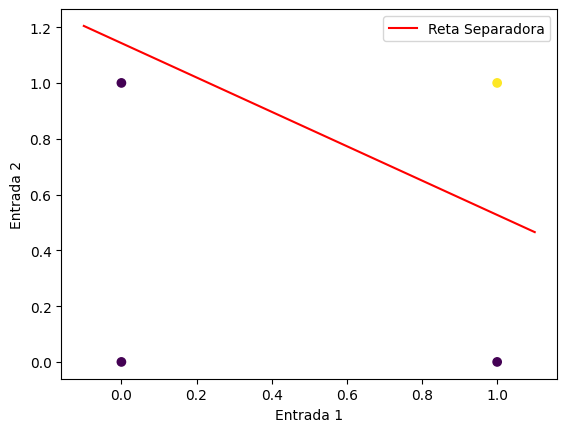

In [14]:
# Plotar gráfico da reta separadora
w1, w2 = neuronio.pesos
b = neuronio.bias
x = np.linspace(-0.1, 1.1, 2)
y = (-w1 * x - b) / w2

plt.scatter(entradas[:, 0], entradas[:, 1], c=saida_desejada)
plt.plot(x, y, '-r', label='Reta Separadora')
plt.xlabel('Entrada 1')
plt.ylabel('Entrada 2')
plt.legend()
plt.show()